<a href="https://colab.research.google.com/github/PiyushChall/Iris-Classifier/blob/main/Iris_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Iris_Classifier**

*This is a simple Neural network that classifies Iris flowers based on their features.
The Iris Dataset is used for classification.*

Dataset link: https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv

# Installation

In [1]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

# Importing modules

**Torch**

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

**Matplot**

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

**Pandas**

In [4]:
import pandas as pd

**Numpy**

In [5]:
import numpy as np

**SkLearn**

In [6]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score

# Using GPU

In [7]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

In [8]:
print(device)

cuda


# Creating Model with Simpel Neural Network

In [9]:
class Model(nn.Module):
  def __init__(self, input_features = 4, hidden1 = 10, hidden2 = 12, output_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(input_features, hidden1)
    self.fc2 = nn.Linear(hidden1, hidden2)
    self.out = nn.Linear(hidden2, output_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

# Picking a seed and initiaing the model

In [10]:
torch.manual_seed(10)
model = Model()
model = model.to(device) #model becomes faster if gpu is available

In [11]:
model

Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=12, bias=True)
  (out): Linear(in_features=12, out_features=3, bias=True)
)

# Loading Data

In [12]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

In [13]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Renaming elements from strings to integers

In [14]:
df['species'] = df['species'].replace("setosa", 0.0)
df['species'] = df['species'].replace("versicolor", 1.0)
df['species'] = df['species'].replace("virginica", 2.0)

In [15]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# Train Test Split

In [16]:
x = df.drop("species", axis = 1)
y = df["species"]

In [17]:
x = x.values
y = y.values

In [18]:
X_train, X_test, Y_train, Y_test = tts(x, y, test_size = 0.2, random_state = 10)

# Converting to tensors

In [24]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
X_train = X_train.to(device)
X_test = X_test.to(device)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)
Y_train = Y_train.to(device)
Y_test = Y_test.to(device)

# Loss function

In [20]:
Loss = nn.CrossEntropyLoss()

# Optimizer

In [21]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

# Epochs

In [22]:
epochs = 100
losses = []

# Traing model

In [26]:
for i in range(epochs):
  #do prediction
  y_pred = model.forward(X_train)

  #Measure loss/error
  loss = Loss(y_pred, Y_train)

  #Tracking loss
  losses.append(loss.cpu().detach().numpy())


  #print every 10 epochs
  if i % 10 == 0:
    print(f"Epoch: {i} and Loss: {loss}")

  #Back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and Loss: 1.1940585374832153
Epoch: 10 and Loss: 0.9622482657432556
Epoch: 20 and Loss: 0.7257736325263977
Epoch: 30 and Loss: 0.49867352843284607
Epoch: 40 and Loss: 0.3634105324745178
Epoch: 50 and Loss: 0.25862032175064087
Epoch: 60 and Loss: 0.17792238295078278
Epoch: 70 and Loss: 0.12909577786922455
Epoch: 80 and Loss: 0.10263876616954803
Epoch: 90 and Loss: 0.08789212256669998


# Visualizing

Text(0, 0.5, 'Loss/Error')

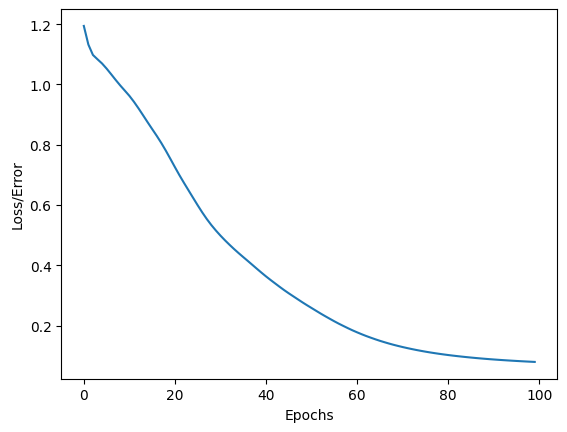

In [27]:
plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss/Error")

# Evaluating Test data

In [29]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  y_pred = torch.argmax(y_eval, dim=1)
  loss = Loss(y_eval, Y_test)
  accuracy = accuracy_score(Y_test.cpu(), y_pred.cpu())

In [30]:
loss

tensor(0.0707, device='cuda:0')

In [31]:
accuracy = accuracy * 100
print(accuracy)

100.0


# Predicting with random data

In [34]:
new_iris = torch.tensor([5.1,	3.5, 1.4,	0.2]) #The first flower in our dataset
new_iris = new_iris.to(device)

In [35]:
#Here the first value should be the highest
with torch.no_grad():
  print(model(new_iris))

tensor([  8.8919,   3.8851, -12.4127], device='cuda:0')


# Saving the new born model

In [36]:
torch.save(model.state_dict(), "Iris_classifier.pt")

# Load the Model

In [38]:
new_model = Model()
new_model.load_state_dict(torch.load("Iris_classifier.pt"))
new_model = new_model.to(device)

In [39]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=12, bias=True)
  (out): Linear(in_features=12, out_features=3, bias=True)
)

In [40]:
new_iris = torch.tensor([5.1,	3.5, 1.4,	0.2])
new_iris = new_iris.to(device)
with torch.no_grad():
  print(new_model(new_iris))

tensor([  8.8919,   3.8851, -12.4127], device='cuda:0')


# Predicting through user inputs

In [41]:
sepal_length_input = float(input("Feed me Your flower's Sepal Length: "))
sepal_width_input = float(input("Feed me Your flower's Sepal Width: "))
petal_length_input = float(input("Feed me Your flower's Petal Length: "))
petal_width_input = float(input("Feed me Your flower's Petal Width: "))

Feed me Your flower's Sepal Length: 1.2
Feed me Your flower's Sepal Width: 1.0
Feed me Your flower's Petal Length: 0.2
Feed me Your flower's Petal Width: 1.3


In [42]:
user_flower = torch.tensor([sepal_length_input, sepal_width_input, petal_length_input, petal_width_input])
user_flower = user_flower.to(device)
with torch.no_grad():
  flower_predict = model(user_flower)

In [43]:
flower_predict

tensor([-0.0732,  1.8973,  0.3115], device='cuda:0')